In [109]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [110]:
import numpy as np
import pandas as pd

In [111]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [112]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [113]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [114]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [115]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [116]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [117]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [118]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from from most recent date in database
most_current_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_current_date = str(most_current_date)[2:-3]
print(most_current_date)

2017-08-23


In [119]:
year_from_current = str(eval(most_current_date[0:4])-1) + most_current_date[4:]
print(year_from_current)

2016-08-23


In [120]:
# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_from_current).all()

In [121]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Change datatype from element to datetime object on Pandas
prcp_12_df = pd.DataFrame(query,columns=['date', 'precipitation'])
prcp_12_df.set_index("date", inplace=True)
prcp_12_df.rename(columns={"prcp_12": "precipitation"}, inplace=True)
prcp_12_df.head()


,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [122]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


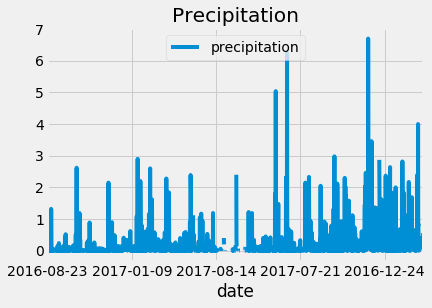

In [123]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_12_df .plot(title="Precipitation")
plt.legend(loc='upper center')
plt.savefig("Images/Precipitation.png")
plt.show()


![precipitation](Images/precipitation.png)

In [124]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_12_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [125]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(func.count(Station.station))
station_count = stations[0]
station_count

(9)

In [126]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, 
                                func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(f"Most Active Stations")
active_stations

Most Active Stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [127]:
most_active_station=active_stations[0][0]
print(f"Most Active Station: {most_active_station}")

Most Active Station: USC00519281


In [128]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
print(f"Most Active Station Temperatures")
print(f"min: {most_active_temps[0][0]} Max: {most_active_temps[0][1]} Average: {round(most_active_temps[0][2], 1)}")

#print(f"min: {most_active_temps[0][0]} Max: {most_active_temps[0][1]} Average: {round(most_active_temps[0][2], 1)}")

Most Active Station Temperatures
min: 54.0 Max: 85.0 Average: 71.7


In [129]:
# Choose the station with the highest number of temperature observations.
most_active_temps = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active_temps=most_active_temps[0]

most_active_temps


'USC00519281'

In [130]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
list = session.query(Measurement.tobs).\
filter(Measurement.station == "USC00519281", Measurement.station == Station.station, Measurement.date >="2016-08-23", Measurement.date <="2017-08-23").\
all()

In [131]:
temperatures = [temp[0] for temp in list]

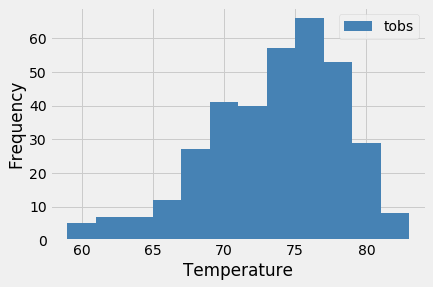

In [132]:
plt.hist(temperatures, bins=12, color='steelblue')
plt.ylabel('Frequency',)
plt.xlabel('Temperature',)
labels = ['tobs']
plt.legend(labels)

![precipitation](Images/station-histogram.png)

In [133]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [134]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps(start_date="2017-03-22", end_date="2017-03-29"))

[(68.0, 74.10416666666667, 80.0)]


In [135]:
#Creating dataframe using min, max,and avg values
trip_df = pd.DataFrame(trip, columns=['min', 'avg', 'max'])

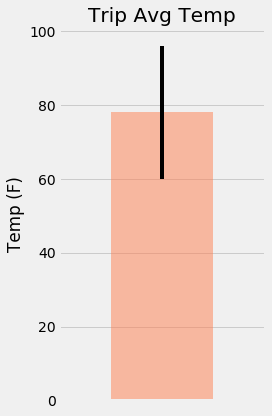

In [136]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

trip_df.plot.bar(y='avg', yerr=(trip_temp_df['max'] - trip_temp_df['min']), title='Trip Avg Temp', color='coral', alpha=0.5, figsize=(4,6))
plt.xticks(np.arange(1, 1.0))
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.gca().legend_.remove()
plt.savefig("Images/TripAvgTemp.png")
plt.show()

In [137]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def precipitation(start_date, end_date):
    
    sel = [Measurement.station,Station.name,Measurement.prcp,Station.latitude,Station.longitude,Station.elevation]
    
    
    
    return session.query(*sel).\
            filter(Measurement.station == Station.station).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.station).order_by(Measurement.prcp.desc()).all()

print(precipitation('2017-03-22','2017-03-29'))

[('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 0.0, 21.33556, -157.71139, 19.5), ('USC00519397', 'WAIKIKI 717.2, HI US', 0.0, 21.2716, -157.8168, 3.0), ('USC00519281', 'WAIHEE 837.5, HI US', 0.0, 21.45167, -157.84888999999998, 32.9), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 0.0, 21.3331, -157.8025, 152.4), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 0.0, 21.5213, -157.8374, 7.0), ('USC00513117', 'KANEOHE 838.1, HI US', 0.0, 21.4234, -157.8015, 14.6), ('USC00517948', 'PEARL CITY, HI US', None, 21.3934, -157.9751, 11.9)]


## Optional Challenge Assignment

In [138]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [108]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip


# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
